In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
df_train1= pd.read_csv('WDBC_PCA2_Train.csv')
df_train = df_train1.iloc[:, 1:]
# print(df_train)
X_train_orig = df_train.iloc[:, :-1]
y_train_orig = df_train.iloc[:, -1]


val1=pd.read_csv('WDBC_PCA2_Validation.csv')
test1=pd.read_csv('WDBC_PCA2_Test.csv')

val = val1.iloc[:, 1:]
test = test1.iloc[:, 1:]

X_val_orig = val.iloc[:, :-1]
y_val_orig = val.iloc[:, -1]

X_test_orig = test.iloc[:, :-1]
y_test_orig = test.iloc[:, -1]

In [21]:
print(X_val_orig)
print(X_train_orig)

               0          1
0    -382.060379   3.496313
1    -357.523018  31.432125
2    -627.748970 -43.662128
3    -400.083664 -31.464596
4    -344.651988  27.138570
..           ...        ...
109  1009.782791 -19.762633
110  -138.992167  19.360485
111   -82.104514  82.723744
112  -374.490762 -12.940678
113  -393.257283  18.842503

[114 rows x 2 columns]
              0           1
0     52.802015  -14.065530
1   -607.814127  -51.558825
2    -29.600317   32.675362
3    651.050225  212.011995
4   -366.139824    6.958892
..          ...         ...
336 -677.878130   -9.403611
337 -347.629230   62.310743
338 -414.167107   -1.590268
339 -278.731107   15.904957
340  -55.801152   -5.594191

[341 rows x 2 columns]


K=1
Confusion Matrix:
[[67  4]
 [ 9 34]]
Accuracy: 0.8860, Precision: 0.8947, Recall: 0.7907, F1-score: 0.8395

K=7
Confusion Matrix:
[[71  0]
 [ 7 36]]
Accuracy: 0.9386, Precision: 1.0000, Recall: 0.8372, F1-score: 0.9114

K=11
Confusion Matrix:
[[70  1]
 [ 9 34]]
Accuracy: 0.9123, Precision: 0.9714, Recall: 0.7907, F1-score: 0.8718



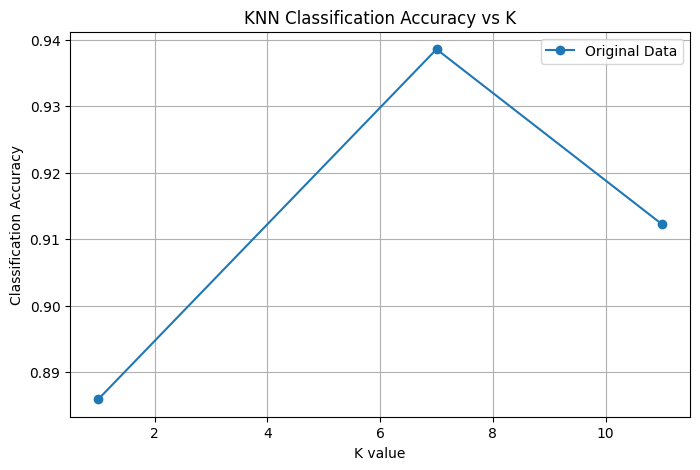

In [22]:
accuracy_scores = []
# Define K values
k_values = [1, 7, 11]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_orig, y_train_orig)
    y_pred = knn.predict(X_val_orig)

    cm = confusion_matrix(y_val_orig, y_pred)
    acc = accuracy_score(y_val_orig, y_pred)
    precision = precision_score(y_val_orig, y_pred)
    recall = recall_score(y_val_orig, y_pred)
    f1 = f1_score(y_val_orig, y_pred)

    print(f"K={k}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

    accuracy_scores.append(acc)
# 6. Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', label='Original Data')
plt.xlabel("K value")
plt.ylabel("Classification Accuracy")
plt.title("KNN Classification Accuracy vs K")
plt.legend()
plt.grid()
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_orig, y_train_orig)
y_pred = knn.predict(X_test_orig)

cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
precision = precision_score(y_test_orig, y_pred)
recall = recall_score(y_test_orig, y_pred)
f1 = f1_score(y_test_orig, y_pred)

print(f"K={1}")
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

K=1
Confusion Matrix:
[[71  1]
 [ 7 35]]
Accuracy: 0.9298, Precision: 0.9722, Recall: 0.8333, F1-score: 0.8974

